## Import Packages

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs
import numpy as np
from scipy.stats import linregress

## Load and Query the CMIP6 AWS Catalog

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

### Load Data From CanESM5 Model (Canadian Earth System Model v.5)

In [3]:
# Specify search terms to query catalog for CanESM5 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id = ['CanESM5']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = ['r10i1p1f1']

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon' 

# variable_id: which climate variable do you want? Here we want surface air temperature
variable_id = 'tas' 

In [4]:
# Search through catalog, store results in "res" variable
res_canesm5 = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res_canesm5.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CCCma,CanESM5,historical,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/CCCma/CanESM5/histor...,NaN,20190429
1,ScenarioMIP,CCCma,CanESM5,ssp585,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
2,ScenarioMIP,CCCma,CanESM5,ssp370,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
3,ScenarioMIP,CCCma,CanESM5,ssp126,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429
4,ScenarioMIP,CCCma,CanESM5,ssp245,r10i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/CCCma/CanESM5...,NaN,20190429


### Read information and store as an xarray object

#### Read in historical data

In [5]:
# Read in the historical data file
canesm5_hist_data= xr.open_zarr(res_canesm5.df['zstore'][0], storage_options={'anon': True})
print(canesm5_hist_data)

<xarray.Dataset> Size: 65MB
Dimensions:    (lat: 64, bnds: 2, lon: 128, time: 1980)
Coordinates:
    height     float64 8B ...
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
    lat_bnds   (lat, bnds) float64 1kB dask.array<chunksize=(64, 2), meta=np.ndarray>
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    lon_bnds   (lon, bnds) float64 2kB dask.array<chunksize=(128, 2), meta=np.ndarray>
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object 32kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 65MB dask.array<chunksize=(600, 64, 128), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            55f484f90aff0e32c5a8e92a42c6b9ae7ffe6224
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid

#### Scenario: SSP245 - Moderate emissions (Business As Usual)

In [6]:
# Read in future data files
# SSP245 - Moderate emissions (business as usual)
canesm5_ssp245_data= xr.open_zarr(res_canesm5.df['zstore'][4], storage_options={'anon': True})

# Concatenate historical and future projection data
canesm5_ssp245_data = xr.concat([canesm5_hist_data, canesm5_ssp245_data], dim="time")

print(canesm5_ssp245_data)

<xarray.Dataset> Size: 99MB
Dimensions:    (time: 3012, lat: 64, lon: 128, bnds: 2)
Coordinates:
    height     float64 8B 2.0
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
    lat_bnds   (lat, bnds) float64 1kB -90.0 -86.58 -86.58 ... 86.58 86.58 90.0
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    lon_bnds   (lon, bnds) float64 2kB -1.406 1.406 1.406 ... 355.8 355.8 358.6
  * time       (time) object 24kB 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds  (time, bnds) object 48kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 99MB dask.array<chunksize=(600, 64, 128), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            55f484f90aff0e32c5a8e92a42c6b9ae7ffe6224
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:            

### Scenario SSP585 - Very high emissions (fossil-fueled)

In [7]:
# Read in future data files
# SSP585 - Very high emissions (fossil-fueled)
canesm5_ssp585_data= xr.open_zarr(res_canesm5.df['zstore'][1], storage_options={'anon': True})

# Concatenate historical and future projection data
canesm5_ssp585_data = xr.concat([canesm5_hist_data, canesm5_ssp585_data], dim="time")

print(canesm5_ssp585_data)

<xarray.Dataset> Size: 99MB
Dimensions:    (time: 3012, lat: 64, lon: 128, bnds: 2)
Coordinates:
    height     float64 8B 2.0
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
    lat_bnds   (lat, bnds) float64 1kB -90.0 -86.58 -86.58 ... 86.58 86.58 90.0
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    lon_bnds   (lon, bnds) float64 2kB -1.406 1.406 1.406 ... 355.8 355.8 358.6
  * time       (time) object 24kB 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
    time_bnds  (time, bnds) object 48kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 99MB dask.array<chunksize=(600, 64, 128), meta=np.ndarray>
Attributes: (12/56)
    CCCma_model_hash:            55f484f90aff0e32c5a8e92a42c6b9ae7ffe6224
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:            

## Load Data From CESM2 Model (NCAR - Community Earth System Model)

In [8]:
# Explore CESM2 model data
res_cesm2 = catalog.search(activity_id="ScenarioMIP",  source_id ='CESM2')

# Convert to a data frame
res_CESM2_df = res_cesm2.df
print('Ensemble member IDs: ', res_CESM2_df['member_id'].unique())
print('Ensemble member IDs: ', res_CESM2_df['experiment_id'].unique())

Ensemble member IDs:  ['r1i1p1f1' 'r2i1p1f1' 'r11i1p1f1' 'r10i1p1f1' 'r4i1p1f1']
Ensemble member IDs:  ['ssp245' 'ssp585' 'ssp126' 'ssp370']


In [9]:
# Specify search terms to query catalog for CanESM5 data
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: which model do you want? 
source_id = ['CESM2']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? Here we want r10i1p1f1
member_id = ['r4i1p1f1']

# table_id: which part of the Earth system and time resolution do you want? Here we want monthly atmosphere data
table_id = 'Amon' 

# variable_id: which climate variable do you want? Here we want surface air temperature
variable_id = 'tas' 

In [10]:
# Search through catalog, store results in "res" variable
res_cesm2 = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res_cesm2.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/CMIP/NCAR/CESM2/historica...,NaN,20190308
1,ScenarioMIP,NCAR,CESM2,ssp245,r4i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
2,ScenarioMIP,NCAR,CESM2,ssp585,r4i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
3,ScenarioMIP,NCAR,CESM2,ssp126,r4i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528
4,ScenarioMIP,NCAR,CESM2,ssp370,r4i1p1f1,Amon,tas,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/NCAR/CESM2/ss...,NaN,20200528


### Read-in Data

In [11]:
# Read in just the historical data file
cesm2_hist_data = xr.open_zarr(res_cesm2.df['zstore'][0], storage_options={'anon': True})

# Read in future data files
# SSP245 - Moderate emissions (business as usual)
cesm2_ssp245_data = xr.open_zarr(res_cesm2.df['zstore'][1], storage_options={'anon': True})
# Concatenate historical and future projection data
cesm2_ssp245_data = xr.concat([cesm2_hist_data, cesm2_ssp245_data], dim="time")

# SSP585 - Very high emissions (fossil-fueled)
cesm2_ssp585_data = xr.open_zarr(res_cesm2.df['zstore'][2], storage_options={'anon': True})
# Concatenate historical and future projection data
cesm2_ssp585_data = xr.concat([cesm2_hist_data, cesm2_ssp585_data], dim="time")

print(cesm2_ssp245_data)
print(cesm2_ssp585_data)

<xarray.Dataset> Size: 676MB
Dimensions:    (time: 3012, lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (time, lat, nbnd) float64 9MB -90.0 -89.53 -89.53 ... 89.53 90.0
  * lon        (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 2kB -0.625 0.625 0.625 ... 358.1 358.1 359.4
  * time       (time) object 24kB 1850-01-15 12:00:00 ... 2100-12-15 12:00:00
    time_bnds  (time, nbnd) object 48kB dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 666MB dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  182500.0
    case_id:                18
    ...              

## Region of Interest - Washington State

**Washington State** is located on the West Coast of the United States, bordering Canada to the north. The total area of the state is approximately 71,300 square miles. Its northerly latitude, between 46° and 49°, contributes to a generally mild climate.

The state’s topography is dominated by the Cascade Mountain Range, which divides Washington into western and eastern regions. West of the Cascades (Western Washington), the climate is maritime, with mild temperatures, high precipitation, and frequent fog. East of the Cascades (Eastern Washington), the climate exhibits both continental and marine influences, featuring hotter summers, colder winters, and lower precipitation.

The average annual temperature for the entire state is approximately 8.4°C.

Read about Washington state's climate on [the Regional Climate Centers (RCC) website](https://wrcc.dri.edu/Climate/narrative_wa.php).

<img src="Assets/Washington_topographic_map-fr.png" alt="Washington State" width="800">

*Image from [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Washington_topographic_map-fr.svg#filelinks)*


In [12]:
# Define min/max bounds for Washington state
lat_min, lat_max = 45.5, 49.1
lon_min, lon_max = 235.0, 243.5

## Calculate a Time Series

### Calculate Regionally Average Temperature for Washington State.


In [13]:
# Convert time to datetime64 format

# canESM5
canesm5_ssp245_time = canesm5_ssp245_data.time.astype('datetime64[ns]')
canesm5_ssp585_time = canesm5_ssp585_data.time.astype('datetime64[ns]')

# CESM2
cesm2_ssp245_time = cesm2_ssp245_data.time.astype('datetime64[ns]')
cesm2_ssp585_time = cesm2_ssp585_data.time.astype('datetime64[ns]')

In [14]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere

# canESM5 - SSP245
canesm5_ssp245_tas_WA_lat = (canesm5_ssp245_data.lat >= lat_min) & (canesm5_ssp245_data.lat <= lat_max)
canesm5_ssp245_tas_WA_lon = (canesm5_ssp245_data.lon >= lon_min) & (canesm5_ssp245_data.lon <= lon_max)
# Find points where the mask value is True, drop all other points
canesm5_ssp245_tas_WA = canesm5_ssp245_data.where(canesm5_ssp245_tas_WA_lat & canesm5_ssp245_tas_WA_lon, drop=True)

# canESM5 - SSP585
canesm5_ssp585_tas_WA_lat = (canesm5_ssp585_data.lat >= lat_min) & (canesm5_ssp585_data.lat <= lat_max)
canesm5_ssp585_tas_WA_lon = (canesm5_ssp585_data.lon >= lon_min) & (canesm5_ssp585_data.lon <= lon_max)
# Find points where the mask value is True, drop all other points
canesm5_ssp585_tas_WA = canesm5_ssp585_data.where(canesm5_ssp585_tas_WA_lat & canesm5_ssp585_tas_WA_lon, drop=True)

# CESM2 - SSP245
cesm2_ssp245_tas_WA_lat = (cesm2_ssp245_data.lat >= lat_min) & (cesm2_ssp245_data.lat <= lat_max)
cesm2_ssp245_tas_WA_lon = (cesm2_ssp245_data.lon >= lon_min) & (cesm2_ssp245_data.lon <= lon_max)
# Find points where the mask value is True, drop all other points
cesm2_ssp245_tas_WA = cesm2_ssp245_data.where(cesm2_ssp245_tas_WA_lat & cesm2_ssp245_tas_WA_lon, drop=True)

# CESM2 - SSP585
cesm2_ssp585_tas_WA_lat = (cesm2_ssp585_data.lat >= lat_min) & (cesm2_ssp585_data.lat <= lat_max)
cesm2_ssp585_tas_WA_lon = (cesm2_ssp585_data.lon >= lon_min) & (cesm2_ssp585_data.lon <= lon_max)
# Find points where the mask value is True, drop all other points
cesm2_ssp585_tas_WA = cesm2_ssp585_data.where(cesm2_ssp585_tas_WA_lat & cesm2_ssp585_tas_WA_lon, drop=True)


### Define area weights, calculate average over region and annual average

In [15]:
# Define function to generate area weights
def weights(dat):
    # Calculate weighting factor = cosine of latitude
    coslat = np.cos(np.deg2rad(dat.lat))
    weight_factor = coslat / coslat.mean(dim='lat')
    
    # Weight all points by the weighting factor
    computed_weight = dat * weight_factor
    
    # Return the set of weights: this has dimension equal to that of the input data
    return computed_weight

In [ ]:
# canESM5 - SSP245
# Weight the data by grid box area
canesm5_ssp245_weighted = weights(canesm5_ssp245_tas_WA)
# Average over lat, lon
canesm5_ssp245_wgtmn = canesm5_ssp245_weighted.mean(dim=['lat', 'lon'])
# Calculate annual mean to get a time series
canesm5_ssp245_wgtmn = canesm5_ssp245_wgtmn.groupby('time.year').mean()
# Convert to Celcius
canesm5_ssp245_wgtmn = canesm5_ssp245_wgtmn - 273.15

# canESM5 - SSP585
# Weight the data by grid box area
canesm5_ssp585_weighted = weights(canesm5_ssp585_tas_WA)
# Average over lat, lon
canesm5_ssp585_wgtmn = canesm5_ssp585_weighted.mean(dim=['lat', 'lon'])
# Calculate annual mean to get a time series
canesm5_ssp585_wgtmn = canesm5_ssp585_wgtmn.groupby('time.year').mean()
# Convert to Celcius
canesm5_ssp585_wgtmn = canesm5_ssp585_wgtmn - 273.15

# CESM2 - SSP245
# Weight the data by grid box area
cesm2_ssp245_weighted = weights(cesm2_ssp245_tas_WA)
# Average over lat, lon
cesm2_ssp245_wgtmn = cesm2_ssp245_weighted.mean(dim=['lat', 'lon'])
# Calculate annual mean to get a time series
cesm2_ssp245_wgtmn = cesm2_ssp245_wgtmn.groupby('time.year').mean()
# Convert to Celcius
cesm2_ssp245_wgtmn = cesm2_ssp245_wgtmn - 273.15

# CESM2 - SSP585
# Weight the data by grid box area
cesm2_ssp585_weighted = weights(cesm2_ssp585_tas_WA)
# Average over lat, lon
cesm2_ssp585_wgtmn = cesm2_ssp585_weighted.mean(dim=['lat', 'lon'])
# Calculate annual mean to get a time series
cesm2_ssp585_wgtmn = cesm2_ssp585_wgtmn.groupby('time.year').mean()
# Convert to Celcius
cesm2_ssp585_wgtmn = cesm2_ssp585_wgtmn - 273.15


In [17]:
# Display time coordinate: now it's called year
print(canesm5_ssp245_wgtmn.year)
print(cesm2_ssp585_wgtmn.year)

<xarray.DataArray 'year' (year: 251)> Size: 2kB
array([1850, 1851, 1852, ..., 2098, 2099, 2100])
Coordinates:
    height   float64 8B 2.0
  * year     (year) int64 2kB 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
<xarray.DataArray 'year' (year: 251)> Size: 2kB
array([1850, 1851, 1852, ..., 2098, 2099, 2100])
Coordinates:
  * year     (year) int64 2kB 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100


## Annually and regionally averaged and area-weighted time series
### Area of interest: Washington State

Regional Time Series with Trend Lines for Two Time Periods:
- historical (1850-2015)
- historical plus future (1850-2100)

Is the temperature of Washington state over both of these time periods changing? \
And if so, is this change statistically significant?

In [184]:
# Extract the values of the weighted temperature array and years to speed things up
# canESM5
canesm5_ssp245_tas = canesm5_ssp245_wgtmn.tas.values
canesm5_ssp245_year = canesm5_ssp245_wgtmn.year.values

canesm5_ssp585_tas = canesm5_ssp585_wgtmn.tas.values
canesm5_ssp585_year = canesm5_ssp585_wgtmn.year.values
# historical data is the same for concatenated SSP245 and SSP585 datasets
canesm5_h_tas = canesm5_ssp245_tas[canesm5_ssp245_year <= 2015]
canesm5_h_year = canesm5_ssp245_year[canesm5_ssp245_year <= 2015]

# CESM2
cesm2_ssp245_tas = cesm2_ssp245_wgtmn.tas.values
cesm2_ssp245_year = cesm2_ssp245_wgtmn.year.values

cesm2_ssp585_tas = cesm2_ssp585_wgtmn.tas.values
cesm2_ssp585_year = cesm2_ssp585_wgtmn.year.values
# historical data is the same for concatenated SSP245 and SSP585 datasets
cesm2_h_year = cesm2_ssp245_year[cesm2_ssp245_year <= 2015] 
cesm2_h_tas = cesm2_ssp245_tas[cesm2_ssp245_year <= 2015]

In [185]:
def calculate_statistics(years, temperatures, degree, label):
    # Compute slope and intercept using np.polyfit
    slope, intercept = np.polyfit(years, temperatures, degree)
    
    # Calculate p-value and standard error using linregress for statistical analysis
    _, _, _, p_value, std_err = linregress(years, temperatures)

    # Create the polynomial trend line using np.poly1d
    trend_line = np.poly1d([slope, intercept])
    
    # Format the result
    result = f"Slope: {slope:.4f}°C/year), Intercept: {intercept:.4f}, p-value: {p_value:.4g}, Std Err: {std_err:.4g}"
    
    # Return the coefficients (slope, intercept) and formatted statistics
    return slope, intercept, trend_line, result


#### Calculate statistics and construct a trend line object

In [212]:
# CANESM5
# Historical
canesm5_h_slope, canesm5_h_intercept, canesm5_h_trend_line, canesm5_h_stat = calculate_statistics(
    canesm5_h_year, canesm5_h_tas, 1, 'CANESM5 - Hist')
# Historical + SSP245 Scenario
canesm5_ssp245_slope, canesm5_ssp245_intercept, canesm5_ssp245_trend_line, canesm5_ssp245_stat = calculate_statistics(
    canesm5_ssp245_year, canesm5_ssp245_tas, 1, 'canESM5 - SSP245')
# Historical + SSP585 Scenario
canesm5_ssp585_slope, canesm5_ssp585_intercept, canesm5_ssp585_trend_line, canesm5_ssp585_stat = calculate_statistics(
    canesm5_ssp585_year, canesm5_ssp585_tas, 1, 'canESM5 - SSP585')

# CESM2
# Historical
cesm2_h_slope, cesm2_h_intercept, cesm2_h_trend_line, cesm2_h_stat = calculate_statistics(
    cesm2_h_year, cesm2_h_tas, 1, 'CESM2 - Hist')
# Historical + SSP245 Scenario
cesm2_ssp245_slope, cesm2_ssp245_intercept, cesm2_ssp245_trend_line, cesm2_ssp245_stat = calculate_statistics(
    cesm2_ssp245_year, cesm2_ssp245_tas, 1, 'CESM2 - SSP245')
# Historical + SSP585 Scenario
cesm2_ssp585_slope, cesm2_ssp585_intercept, cesm2_ssp585_trend_line, cesm2_ssp585_stat = calculate_statistics(
    cesm2_ssp585_year, cesm2_ssp585_tas, 1, 'CESM2 - SSP585')



#### Plot Time Series for Historical + Future Projection Scenarios (1850 - 2100)

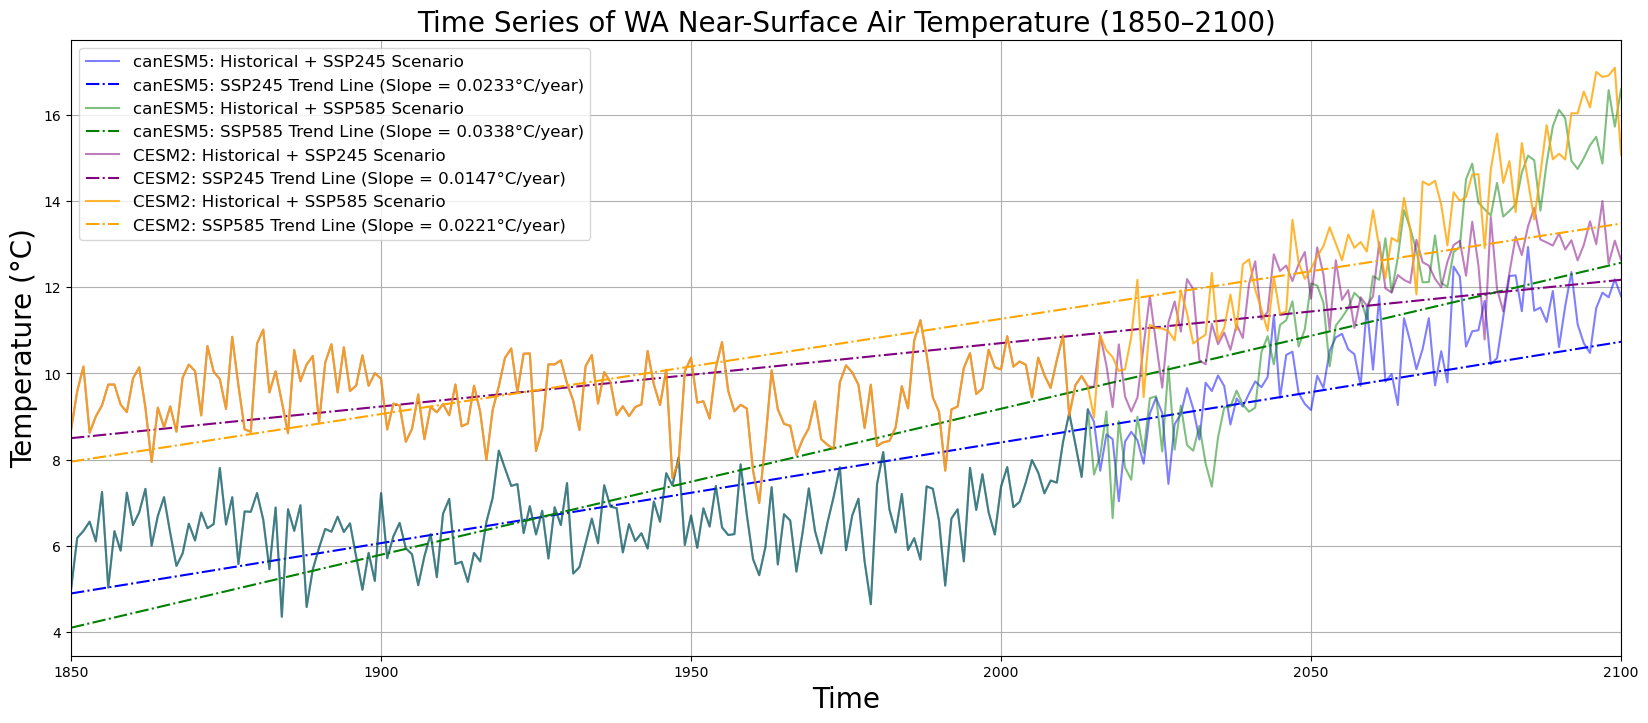

In [200]:
# Set up the figure
fig, ax = plt.subplots(figsize=(20, 8))

# Historical + future: 1850–2100
# canESM5
ax.plot(canesm5_ssp245_year, canesm5_ssp245_tas, label="canESM5: Historical + SSP245 Scenario", color="blue", alpha=0.5)
ax.plot(canesm5_ssp245_year, canesm5_ssp245_trend_line(canesm5_ssp245_year), color='blue', linestyle='-.', label=f'canESM5: SSP245 Trend Line (Slope = {canesm5_ssp245_slope:.4f}°C/year)')

ax.plot(canesm5_ssp585_year, canesm5_ssp585_tas, label="canESM5: Historical + SSP585 Scenario", color="green", alpha=0.5)
ax.plot(canesm5_ssp585_year, canesm5_ssp585_trend_line(canesm5_ssp585_year), color='green', linestyle='-.', label=f'canESM5: SSP585 Trend Line (Slope = {canesm5_ssp585_slope:.4f}°C/year)')

ax.plot(cesm2_ssp245_year, cesm2_ssp245_tas, label="CESM2: Historical + SSP245 Scenario", color="purple", alpha=0.5)
ax.plot(cesm2_ssp245_year, cesm2_ssp245_trend_line(cesm2_ssp245_year), color='purple', linestyle='-.', label=f'CESM2: SSP245 Trend Line (Slope = {cesm2_ssp245_slope:.4f}°C/year)')

ax.plot(cesm2_ssp585_year, cesm2_ssp585_tas, label="CESM2: Historical + SSP585 Scenario", color="orange", alpha=0.8)
ax.plot(cesm2_ssp585_year, cesm2_ssp585_trend_line(cesm2_ssp585_year), color='orange', linestyle='-.', label=f'CESM2: SSP585 Trend Line (Slope = {cesm2_ssp585_slope:.4f}°C/year)')

# Plot settings
ax.set_title("Time Series of WA Near-Surface Air Temperature (1850–2100)", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (°C)", fontsize=20)
ax.set_xlim([1850, 2100]) 
ax.legend(fontsize=12)
ax.grid()

# Show the plot
plt.show()

#### Plot Time Series for Historical Data (1850 - 21015)

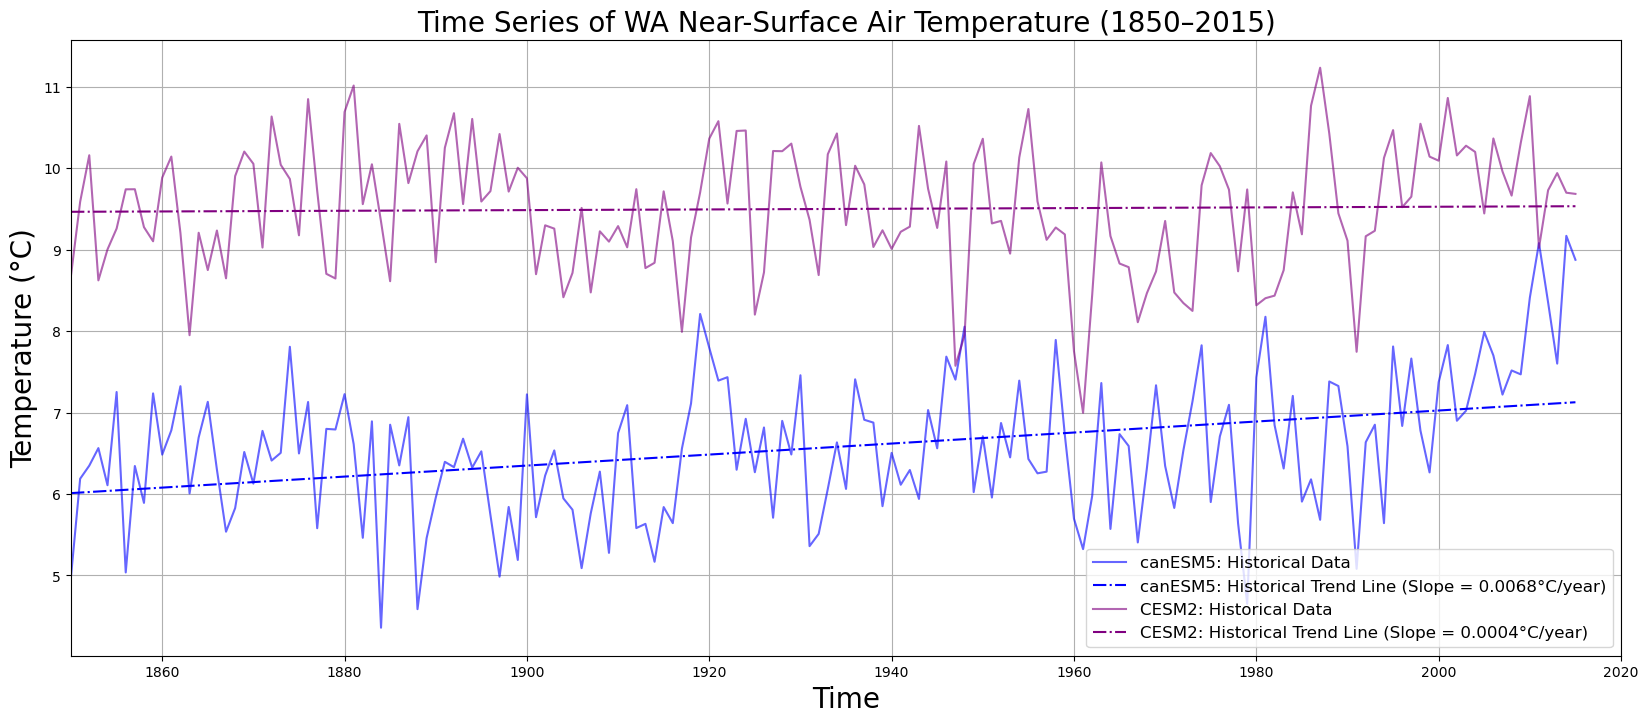

In [199]:
# Set up the figure
fig, ax = plt.subplots(figsize=(20, 8))

# Historical Only: 1850–2015
# canESM5
ax.plot(canesm5_h_year, canesm5_h_tas, label="canESM5: Historical Data", color="blue", alpha=0.6)
ax.plot(canesm5_h_year, canesm5_h_trend_line(canesm5_h_year), color='blue', linestyle='-.', label=f'canESM5: Historical Trend Line (Slope = {canesm5_h_slope:.4f}°C/year)')

ax.plot(cesm2_h_year, cesm2_h_tas, label="CESM2: Historical Data", color="purple", alpha=0.6)
ax.plot(cesm2_h_year, cesm2_h_trend_line(cesm2_h_year), color='purple', linestyle='-.', label=f'CESM2: Historical Trend Line (Slope = {cesm2_h_slope:.4f}°C/year)')

# Plot settings
ax.set_title("Time Series of WA Near-Surface Air Temperature (1850–2015)", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (°C)", fontsize=20)
ax.set_xlim([1850, 2020]) 
ax.legend(fontsize=12)
ax.grid()

# Show the plot
plt.show()

## Evaluate the Statistical Significance of Trend Lines

In [213]:
# CANESM5 
print("CANESM5: \n - Historical: ", canesm5_h_stat, "\n - SSP245 - Moderal Emissions Scenario: ", canesm5_ssp245_stat, "\n - SSP585 - Very High Emissions Scenario", canesm5_ssp585_stat)

# CESM2
print("CESM2: \n - Historical: ", cesm2_h_stat, "\n - SSP245 - Moderal Emissions Scenario: ", cesm2_ssp245_stat, "\n - SSP585 - Very High Emissions Scenario", cesm2_ssp585_stat)

CANESM5: 
 - Historical:  Slope: 0.0068°C/year), Intercept: -6.4963, p-value: 7.995e-07, Std Err: 0.001317 
 - SSP245 - Moderal Emissions Scenario:  Slope: 0.0233°C/year), Intercept: -38.2688, p-value: 2.554e-67, Std Err: 0.0009646 
 - SSP585 - Very High Emissions Scenario Slope: 0.0338°C/year), Intercept: -58.4887, p-value: 5.591e-63, Std Err: 0.001482
CESM2: 
 - Historical:  Slope: 0.0004°C/year), Intercept: 8.6996, p-value: 0.7442, Std Err: 0.001266 
 - SSP245 - Moderal Emissions Scenario:  Slope: 0.0147°C/year), Intercept: -18.6617, p-value: 1.394e-41, Std Err: 0.0008937 
 - SSP585 - Very High Emissions Scenario Slope: 0.0221°C/year), Intercept: -32.8792, p-value: 7.988e-48, Std Err: 0.001209


## Interpretation

From the time series, we can see that all models exhibit statistically significant upward trends in temperature for future projections compared to historical data in Washington State, USA.
Although the historical data also show an upward trend, the rate of warming is considerably lower than what is projected under future scenarios. 

For example, in the CESM2 model, the historical trend is not statistically significant (p-value = 0.7442), while the projected trends under both the Moderate (SSP245: 0.0147°C/year) and Very High Emissions (SSP585: 0.0221°C/year) scenarios are clearly noticeable, with p-values well below the typical significance threshold of 0.05.
Similarly, the CANESM5 model shows a significant upward shift in temperatures for future scenarios (0.0233°C/year and 0.0338°C/year), while historical trends appear noticeably flatter (0.0068°C/year). 

While these models do not predict exact temperatures, they consistently show statistically significant warming trends within each scenario, highlighting a clear signal of increasing temperatures in response to rising emissions.